In [55]:
import os
import pandas as pd
import re
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
nltk.download('punkt')

import sys
print(sys.executable)

C:\Users\AYAN\anaconda3\python.exe


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [57]:
# Downloading necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
# Path to folder containing all CSV files
folder_path = os.path.join(os.getcwd(), "Comments_data")

In [65]:
# Initialize containers
all_comments = []

# Load and combine all comments
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder_path, file))
        if 'text' in df.columns:
            all_comments.extend(df['text'].dropna().tolist())

In [67]:
# Preprocess Comments
def clean_comment(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

stop_words = set(stopwords.words('english'))
cleaned_comments = []

for comment in all_comments:
    cleaned = clean_comment(comment)
    tokens = word_tokenize(cleaned)
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    cleaned_comments.append(" ".join(filtered_tokens))

In [88]:
# Step 4: NLP Analysis
all_words = " ".join(cleaned_comments).split()
word_freq = Counter(all_words)

# Define your custom stopwords
custom_stopwords = set([
    'i', 'you', 'the', 'and', 'but', 'what', 'how', 'can', 'is', 'it', 'this', 'one', 'video', 'would', 'also', 'thank', 'much', 'really',
    'a', 'to', 'do', 'my', 'in', 'for', 'of', 'on', 'we', 'me', 'just', 'so', 'please',
    'like', 'im', 'was', 'your', 'with', 'that', 'be', 'if', 'are', 'an', 'they'
])

# Filter the word list
filtered_words = [word for word in all_words if word not in custom_stopwords and len(word) > 2]

# Count only meaningful words
word_freq = Counter(filtered_words)


sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}
sentiment_scores = []

for comment in cleaned_comments:
    polarity = TextBlob(comment).sentiment.polarity
    sentiment_scores.append(polarity)
    if polarity > 0.1:
        sentiments['positive'] += 1
    elif polarity < -0.1:
        sentiments['negative'] += 1
    else:
        sentiments['neutral'] += 1

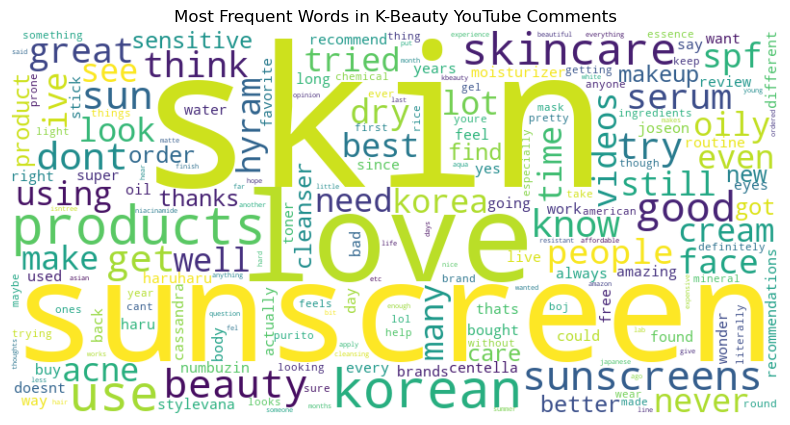

C:\Users\AYAN\AppData\Local\Temp\ipykernel_11856\1789553327.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sentiments.keys()), y=list(sentiments.values()), palette="pastel")


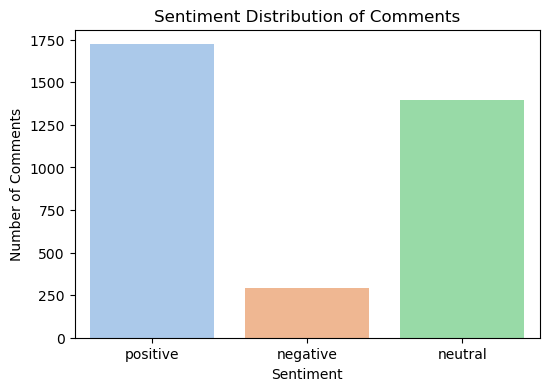

C:\Users\AYAN\AppData\Local\Temp\ipykernel_11856\1789553327.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="Blues_d")


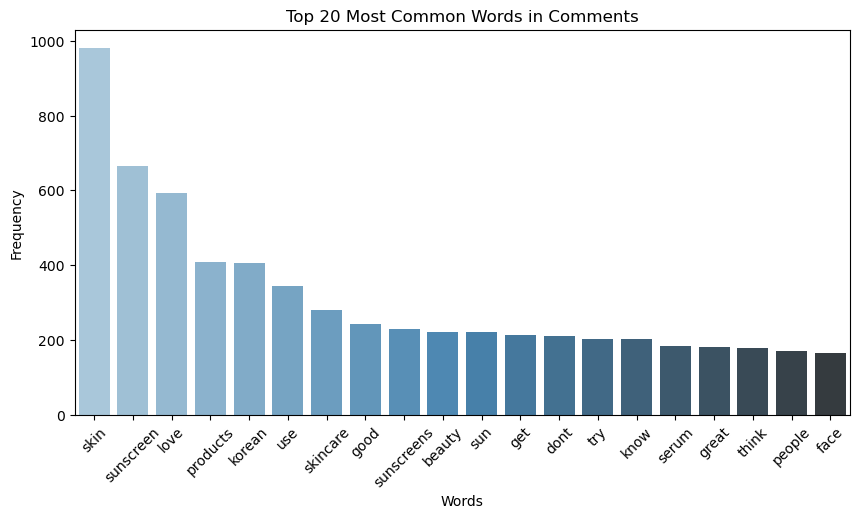

In [90]:
# Step 5: Visualizations & Summary

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in K-Beauty YouTube Comments")
plt.show()

# Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=list(sentiments.keys()), y=list(sentiments.values()), palette="pastel")
plt.title("Sentiment Distribution of Comments")
plt.ylabel("Number of Comments")
plt.xlabel("Sentiment")
plt.show()

# Top 20 words
top_words = dict(word_freq.most_common(20))
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Comments")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

In [92]:
# Save summary results
summary_df = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])
summary_df.to_csv(r"kbeauty_word_frequency_summary.csv", index=False)

# Print sentiment summary
print("Sentiment Summary:", sentiments)

Sentiment Summary: {'positive': 1723, 'negative': 293, 'neutral': 1398}
